In [85]:

import numpy as np
from matplotlib import pyplot as plt
import json
import util
import pandas as pd
from igit_debug.investigate import vprint

In [ ]:
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

In [86]:
with open('./data.json') as f:
    # 500ms~
    data: dict = json.load(f)
chunk = util.get_chunks(data, chunksize=1000, chunk_count=1)[0]
df = pd.DataFrame.from_dict(chunk, orient='index')

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
1577836986143,"{'ask': 7177.83, 'bid': 7177.77}","{'ask': 7158, 'bid': 7157.75}"
1577836989592,"{'ask': 7178.24, 'bid': 7177.78}","{'ask': 7158, 'bid': 7157.75}"
1577836989694,"{'ask': 7178.24, 'bid': 7177.79}","{'ask': 7158, 'bid': 7157.75}"
1577836989903,"{'ask': 7178.24, 'bid': 7178.09}","{'ask': 7158, 'bid': 7157.75}"


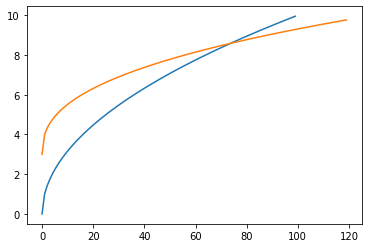

In [52]:
lst1 = range(100)
lst2 = range(120)
plt.plot(lst1, list(map(lambda n:n**0.5, lst1)))
plt.plot(lst2, list(map(lambda n:n**0.4+3, lst2)))

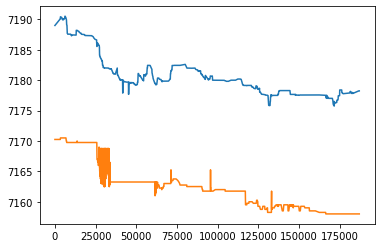

In [87]:
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
keys = []
assetA_asks = []
assetB_asks = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    norm_key = int(k) - key0
    keys.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
plt.plot(keys,assetA_asks)
plt.plot(keys,assetB_asks)
